In [1]:
# Re-imports after a restart
import sys, os, importlib
sys.path.append(os.path.abspath(".."))  # if this notebook is in notebooks/, make ../src visible

import pandas as pd
import matplotlib.pyplot as plt

# Import project modules
import src.data as data_mod
import src.features as features_mod
import src.utils as utils_mod

# Hot-reload for notebook edits
importlib.reload(data_mod)
importlib.reload(features_mod)
importlib.reload(utils_mod)

from src.data import get_data
from src.features import add_features
from src.utils import make_labels


In [2]:
df = get_data("AAPL", start="2015-01-01", end="2023-12-31")
print("Raw data shape:", df.shape)
print(df.columns.tolist())
df.head()


Raw data shape: (2264, 6)
['date', 'open', 'high', 'low', 'close', 'volume']


,date,open,high,low,close,volume
0,2015-01-02,24.718174,24.729270,23.821672,24.261047,212818400
1,2015-01-05,24.030263,24.110150,23.391173,23.577574,257142000
2,2015-01-06,23.641929,23.839426,23.218087,23.579796,263188400
3,2015-01-07,23.788378,24.010284,23.677425,23.910427,160423600
4,2015-01-08,24.238859,24.886826,24.121248,24.829130,237458000


In [3]:
df = add_features(df)
print("With features shape:", df.shape)
df.head()


With features shape: (2231, 14)


,date,open,high,low,close,volume,ret1,ret5,ret10,vol10,volz,rsi14,macd,macd_signal
0,2015-02-20,28.654271,28.850321,28.527287,28.850321,195793600,0.008175,0.024039,0.079707,0.009271,-0.593114,78.737268,1.055489,0.908930
1,2015-02-23,28.966166,29.630056,28.885964,29.630056,283896400,0.027027,0.046585,0.118305,0.009183,0.227530,82.379221,1.123915,0.951927
2,2015-02-24,29.616692,29.763729,29.222366,29.445148,276912400,-0.006241,0.033952,0.103993,0.010687,0.131432,78.926733,1.149966,0.991535
3,2015-02-25,29.309247,29.318160,28.549558,28.692139,298846800,-0.025573,0.000544,0.055483,0.014934,0.406392,66.672381,1.097202,1.012668
4,2015-02-26,28.692144,29.155532,28.206480,29.055281,365150000,0.012656,0.015337,0.044363,0.013846,1.801402,69.159243,1.072328,1.024600


In [4]:
df = make_labels(df, tau=0.0)
print("Final dataset shape:", df.shape)
df.head()


Final dataset shape: (2230, 16)


,date,open,high,low,close,volume,ret1,ret5,ret10,vol10,volz,rsi14,macd,macd_signal,ret_next,y
0,2015-02-20,28.654271,28.850321,28.527287,28.850321,195793600,0.008175,0.024039,0.079707,0.009271,-0.593114,78.737268,1.055489,0.908930,0.027027,1
1,2015-02-23,28.966166,29.630056,28.885964,29.630056,283896400,0.027027,0.046585,0.118305,0.009183,0.227530,82.379221,1.123915,0.951927,-0.006241,0
2,2015-02-24,29.616692,29.763729,29.222366,29.445148,276912400,-0.006241,0.033952,0.103993,0.010687,0.131432,78.926733,1.149966,0.991535,-0.025573,0
3,2015-02-25,29.309247,29.318160,28.549558,28.692139,298846800,-0.025573,0.000544,0.055483,0.014934,0.406392,66.672381,1.097202,1.012668,0.012656,1
4,2015-02-26,28.692144,29.155532,28.206480,29.055281,365150000,0.012656,0.015337,0.044363,0.013846,1.801402,69.159243,1.072328,1.024600,-0.015029,0


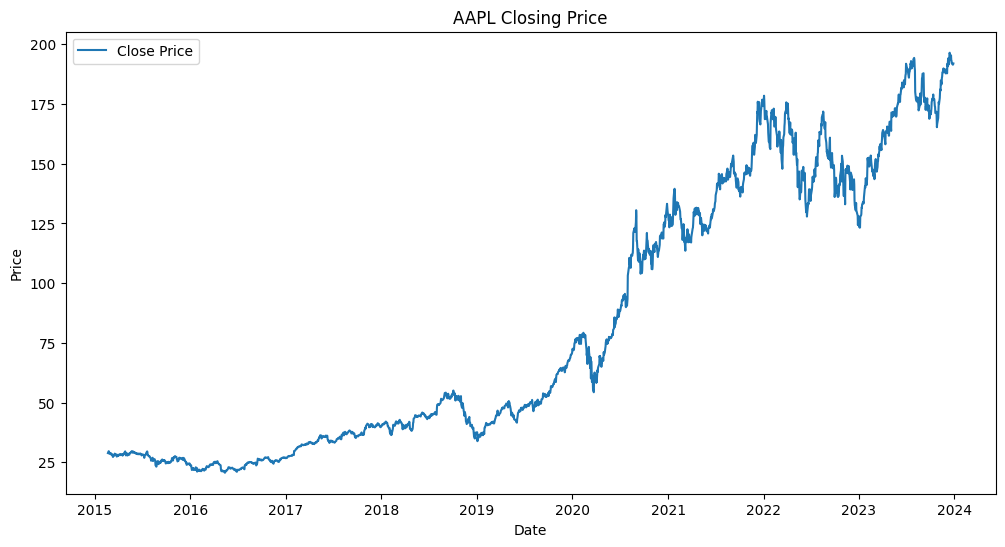

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df["date"], df["close"], label="Close Price")
plt.title("AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


In [6]:
print("Label distribution (0=down, 1=up):")
df["y"].value_counts(normalize=True)


Label distribution (0=down, 1=up):


y
1    0.526009
0    0.473991
Name: proportion, dtype: float64